In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Al observar la descripción de la base de datos, hay algunas cosas que podrían llamar la atención:

La columna "Weekly_Sales" muestra valores que van desde 209,986 hasta 3,818,686. La media semanal de ventas es de aproximadamente 1,046,965. La diferencia entre el valor mínimo y el máximo sugiere una amplia variación en las ventas semanales.

La columna "Holiday_Flag" es binaria, con valores 0 y 1. Indica si una semana en particular es una semana de vacaciones o no.

Las columnas "Temperature" y "Fuel_Price" representan datos numéricos continuos. La temperatura tiene una media de aproximadamente 60.66 y el precio del combustible tiene una media de aproximadamente 3.36.

La columna "CPI" (Índice de Precios al Consumidor) y "Unemployment" (Tasa de Desempleo) también son variables continuas. El CPI tiene una media de aproximadamente 171.58, mientras que la tasa de desempleo tiene una media de aproximadamente 7.99.

In [5]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No hay valores faltantes en ninguno de los atributos de la base de datos, lo que indica que todos los registros tienen valores completos para todas las columnas.

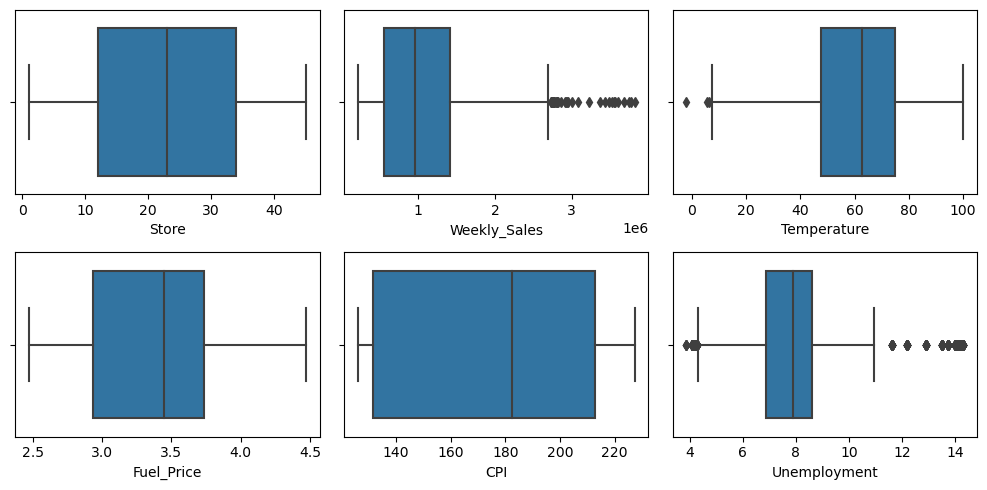

In [10]:
# Evalúe si alguna de las variables contiene datos atípicos (outliers) 
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Store'], ax = axs[0,0])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,1])
plt3 = sns.boxplot(df['Temperature'], ax = axs[0,2])
plt1 = sns.boxplot(df['Fuel_Price'], ax = axs[1,0])
plt2 = sns.boxplot(df['CPI'], ax = axs[1,1])
plt3 = sns.boxplot(df['Unemployment'], ax = axs[1,2])
plt.tight_layout()

In [12]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [13]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Weekly_Sales'] < (Q1 - 1.5 * IQR)) |(df['Weekly_Sales'] > (Q3 + 1.5 * IQR)))]
df.shape

(6401, 8)

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

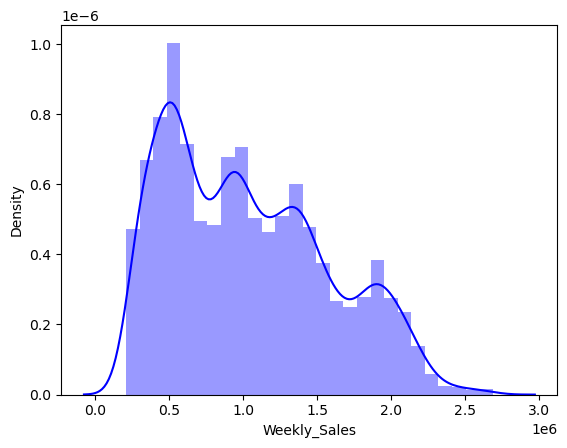

In [15]:
sns.distplot(df['Weekly_Sales'],color="blue")

In [16]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_Unemployment = df.Unemployment.quantile(0.25)
Q3_Unemployment = df.Unemployment.quantile(0.75)
IQR_Unemployment = Q3_Unemployment - Q1_Unemployment  #rango intercuartil
print(IQR_Unemployment)

1.7309999999999999


In [17]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Unemployment'] < (Q1_Unemployment - 1.5 * IQR_Unemployment)) |(df['Unemployment'] > (Q3_Unemployment + 1.5 * IQR_Unemployment)))]
df.shape

(5920, 8)

<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

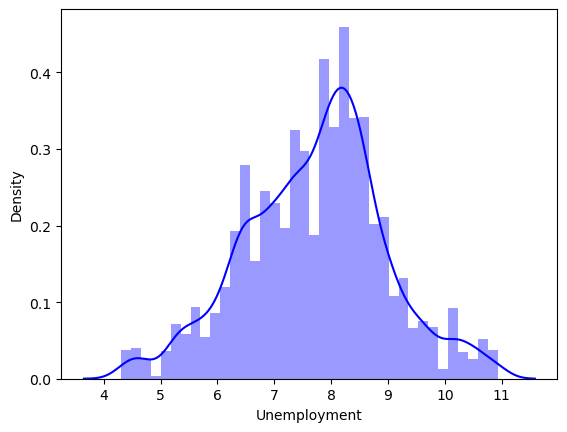

In [18]:
sns.distplot(df['Unemployment'],color="blue")

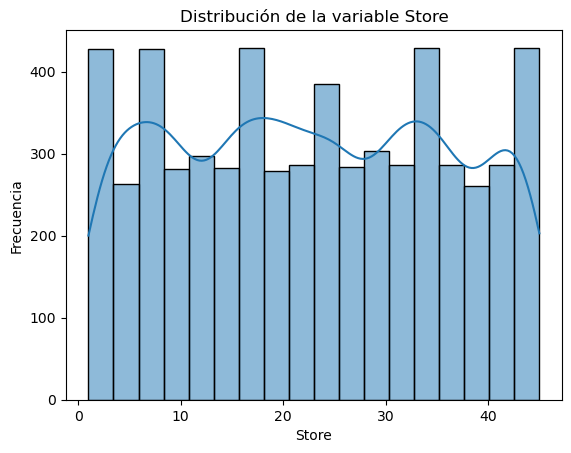

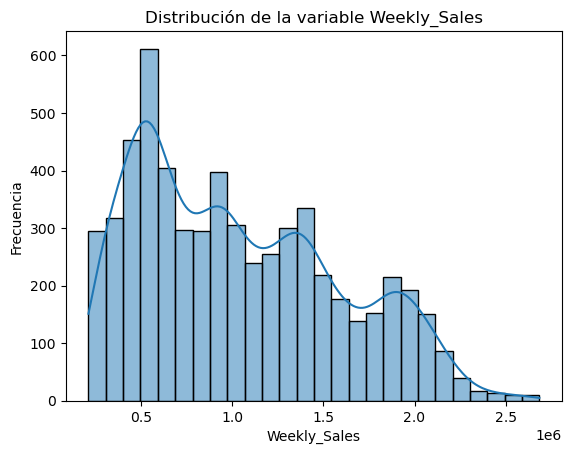

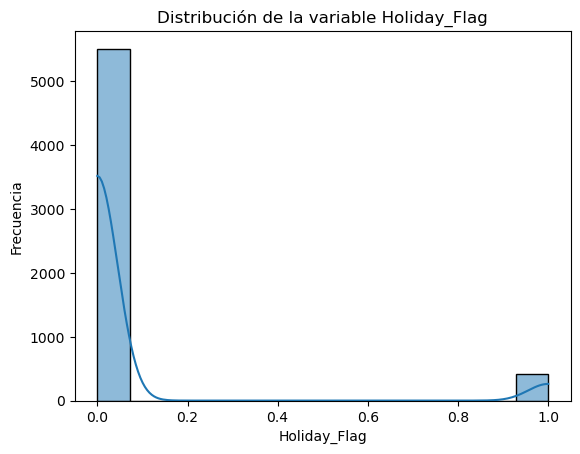

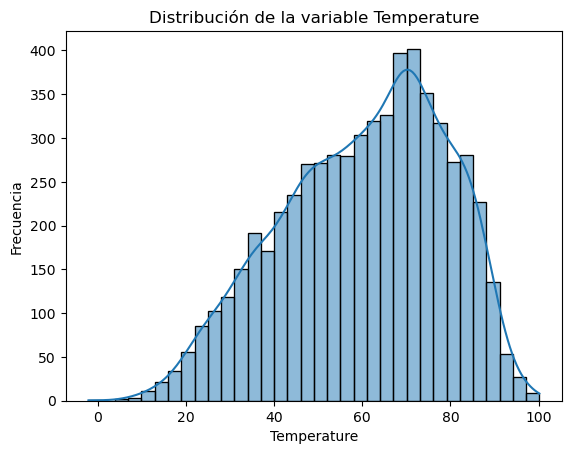

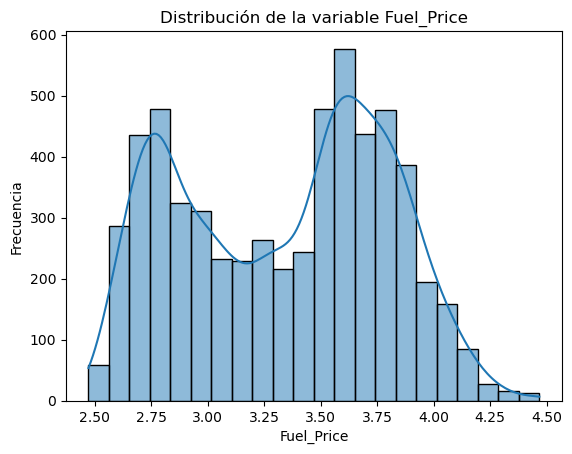

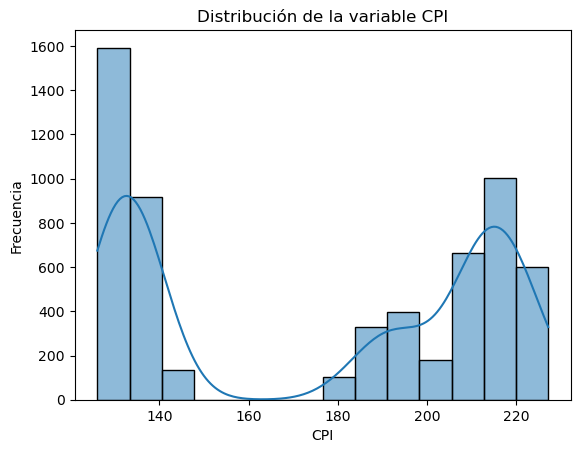

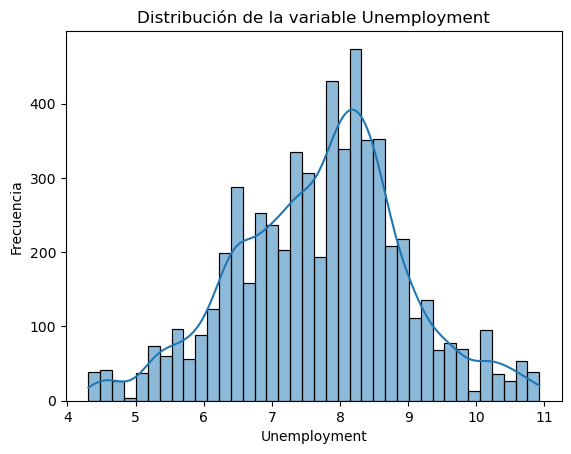

In [19]:
#5 Grafique las distribuciones de las vsriables y a priori comente sobre ellas. 
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de las variables
sns.histplot(df['Store'], kde=True)
plt.title('Distribución de la variable Store')
plt.xlabel('Store')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribución de la variable Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['Holiday_Flag'], kde=True)
plt.title('Distribución de la variable Holiday_Flag')
plt.xlabel('Holiday_Flag')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['Temperature'], kde=True)
plt.title('Distribución de la variable Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['Fuel_Price'], kde=True)
plt.title('Distribución de la variable Fuel_Price')
plt.xlabel('Fuel_Price')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['CPI'], kde=True)
plt.title('Distribución de la variable CPI')
plt.xlabel('CPI')
plt.ylabel('Frecuencia')
plt.show()

sns.histplot(df['Unemployment'], kde=True)
plt.title('Distribución de la variable Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Frecuencia')
plt.show()


La variable "Store" muestra una distribución aparentemente uniforme, lo que indica que hay una cantidad similar de registros para cada tienda.
La variable "Weekly_Sales" tiene una distribución sesgada hacia la derecha, lo que sugiere que la mayoría de las ventas semanales están en el extremo inferior.
La variable "Holiday_Flag" es una variable categórica binaria, por lo que la distribución muestra la proporción de semanas de vacaciones frente a semanas no vacacionales.
La variable "Temperature" muestra una distribución aproximadamente normal, con una concentración de valores alrededor de la media.
La variable "Fuel_Price" tiene una distribución aparentemente normal, pero con una ligera asimetría hacia la izquierda.
La variable "Unemployment" tiene una distribución aparentemente normal, pero con una ligera asimetría hacia la derecha.

In [20]:
#6 Obtenga las correlaciones entre los datos de corte numérico. 
df.corr().style.background_gradient(cmap='coolwarm')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Weekly_Sales,-0.319128,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Holiday_Flag,0.004353,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperature,-0.026186,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
Fuel_Price,0.047717,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
CPI,-0.208596,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Unemployment,0.309445,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


La variable "Store" tiene una correlación negativa moderada (-0.319) con "Weekly_Sales". Esto sugiere que hay una relación lineal débil pero negativa entre el número de la tienda y las ventas semanales.
La variable "Holiday_Flag" muestra una correlación débil positiva (0.024) con "Weekly_Sales". Esto indica que la presencia de una semana de vacaciones puede tener una relación lineal débil pero positiva con las ventas semanales.
La variable "Temperature" tiene una correlación débil negativa (-0.026) con "Weekly_Sales". Esto sugiere que la temperatura puede tener una relación lineal débil pero negativa con las ventas semanales.
La variable "Fuel_Price" muestra una correlación débil positiva (0.019) con "Weekly_Sales". Esto indica una relación lineal débil pero positiva entre el precio del combustible y las ventas semanales.
La variable "CPI" tiene una correlación débil negativa (-0.083) con "Weekly_Sales". Esto sugiere que el Índice de Precios al Consumidor puede tener una relación lineal débil pero negativa con las ventas semanales.
La variable "Unemployment" muestra una correlación débil negativa (-0.073) con "Weekly_Sales". Esto indica que la tasa de desempleo puede tener una relación lineal débil pero negativa con las ventas semanales.

Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.

Para comprender o predecir las ventas semanales de las tiendas, la variable dependiente será Weekly_Sales.

En base a las correlaciones presentadas en la tabla, se  incluirán las siguientes variables  independientes para el modelo:

"Store": Aunque tiene una correlación negativa moderada con las ventas semanales, podría ser relevante considerarla, ya que el número de la tienda puede tener un impacto en las ventas debido a diferencias en tamaño, ubicación, promociones específicas, etc.

"Holiday_Flag": Aunque la correlación es débil, para analizar si las semanas de vacaciones afectan las ventas.

"Temperature" y "Fuel_Price": Aunque las correlaciones son débiles, se presume segpun la hipótesis que la temperatura o el precio del combustible podrían influir en las ventas.

"CPI" y "Unemployment": Aunque tienen correlaciones débiles, para conocer como podrían  afectar las ventas.


Indique que tipo de modelación realizarán y porqué. 

He seleccionado el modelo de regresión logística. En primer lugar, al considerar las ventas semanales de una tienda como la variable dependiente de interés, se busca clasificarlas en categorías de ventas altas o bajas. La regresión logística es especialmente adecuada para este propósito, ya que permite modelar y predecir la probabilidad de que una semana tenga ventas altas o bajas en función de las variables independientes. Esto proporciona una valiosa información sobre los factores económicos que influyen en la probabilidad de éxito en términos de ventas. Además, la interpretación de los coeficientes en un modelo de regresión logística en términos de odds ratios facilita la comprensión de la relación relativa entre las variables independientes y la probabilidad de tener ventas altas o bajas. Por otro lado, la regresión logística también es flexible para manejar variables categóricas relevantes en el análisis económico, como el tipo de promoción o el tipo de producto. 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [25]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [26]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,19,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,52,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,85,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,118,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,20,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,130,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,22,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,55,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,88,718125.53,0,56.47,3.969,192.330854,8.667


In [27]:
X = df[df.columns.difference(['Weekly_Sales'])]
y = df.Weekly_Sales

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =123)

In [30]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4736, 7)  <class 'pandas.core.frame.DataFrame'>
(4736,) 	  <class 'pandas.core.series.Series'>
(1184, 7)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


In [31]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [32]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

261567572030.63925
282814368092.19525


In [35]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

511436.7722706681
531802.9410337962


In [36]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

428858.338282442
441856.89188391296


In [37]:
from sklearn.metrics import r2_score

In [38]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.1283485226330966
El R^2 del subconjunto de prueba es: 0.12121665759517974


 R^2 del subconjunto de entrenamiento, indica que aproximadamente el 12.8% de la variabilidad en la variable dependiente (en este caso, probablemente las ventas semanales) puede explicarse por las variables independientes incluidas en el modelo. En otras palabras, el modelo utilizado explica una proporción relativamente baja de la variabilidad en los datos de entrenamiento.

R^2 del subconjunto de prueba, indica que aproximadamente el 12.1% de la variabilidad en la variable dependiente se explica por las variables independientes en el conjunto de prueba. Esto significa que el modelo tiene una capacidad similar para explicar la variabilidad en los datos de prueba como en los datos de entrenamiento.

In [39]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_)

intercepto: 1785513.665664832
pendiente: [ -2190.77291596   -480.75568332   9934.6826131   60764.88296662
 -14602.97980577   -319.00281241  -2143.75957156]


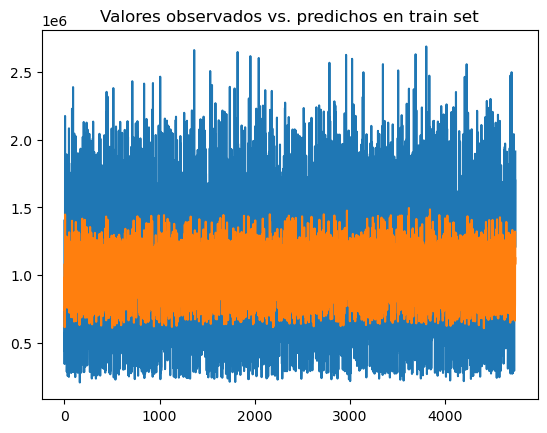

In [40]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

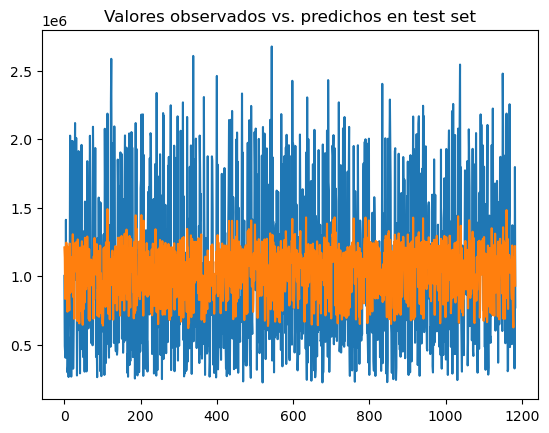

In [41]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [45]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

In [46]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

In [47]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.12834852263309648
El R^2 del subconjunto de prueba es: 0.12121665759517974


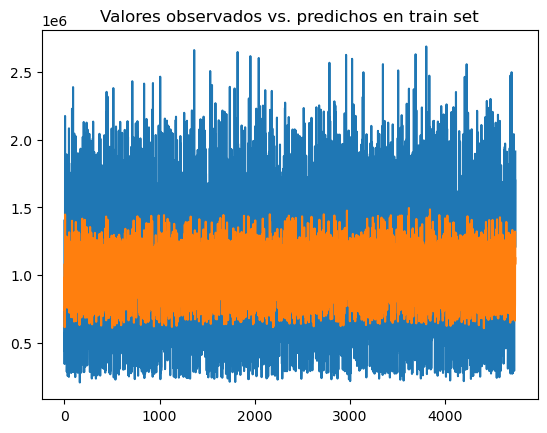

In [48]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

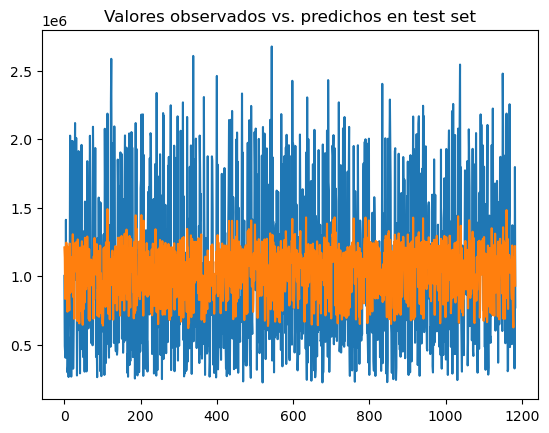

In [49]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

In [50]:
importancia = modelo_regresion_std.coef_

In [51]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: -85462.95486
Variable explicativa No. 1, Score: -19888.06712
Variable explicativa No. 2, Score: 4541.87438
Variable explicativa No. 3, Score: 15318.25155
Variable explicativa No. 4, Score: -191312.12166
Variable explicativa No. 5, Score: -5860.02645
Variable explicativa No. 6, Score: -2686.25884


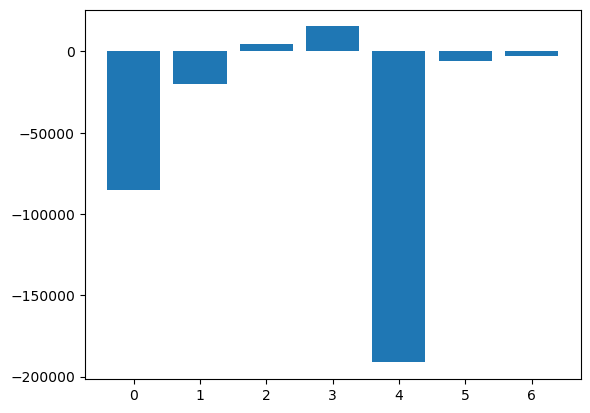

In [52]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

In [ ]:
# Graficar los valores predichos vs los valores reales
plt.plot(valores_reales, label='Valores reales')
plt.plot(valores_predichos, label='Valores predichos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Valores predichos vs Valores reales')
plt.legend()
plt.show()

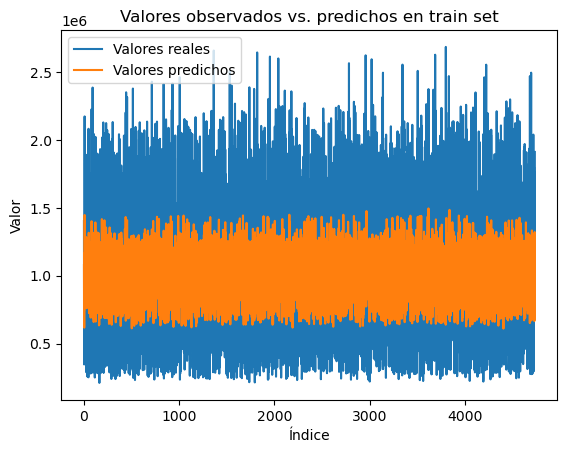

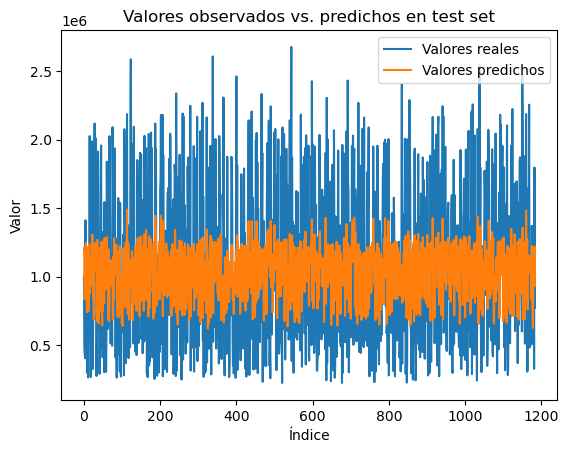

In [53]:
# Gráfico para el conjunto de entrenamiento
fig, ax = plt.subplots()
ax.plot(y_train.values, label='Valores reales')
ax.plot(predicciones_train_std, label='Valores predichos')
plt.title("Valores observados vs. predichos en train set")
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Gráfico para el conjunto de prueba
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Valores reales')
ax.plot(predicciones_test_std, label='Valores predichos')
plt.title("Valores observados vs. predichos en test set")
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Rendimiento del modelo: El modelo tiene un R cuadrado (R^2) bajo tanto en el conjunto de entrenamiento como en el conjunto de prueba, con valores de aproximadamente 0.13 en ambos casos. Esto indica que el modelo no explica una gran proporción de la variabilidad de la variable objetivo.

Error cuadrático medio (MSE) y error absoluto medio (MAE): El MSE y el MAE son métricas utilizadas para evaluar la precisión del modelo. En este caso, se obtienen valores altos para el MSE y el MAE, lo que indica que las predicciones del modelo tienen una discrepancia significativa con respecto a los valores reales.

Importancia de las variables: Según los coeficientes de la regresión, se puede observar que algunas variables tienen un impacto negativo en las ventas semanales (por ejemplo, Fuel_Price y CPI), mientras que otras tienen un impacto positivo (por ejemplo, Store y Unemployment). La magnitud de estos coeficientes indica la importancia relativa de cada variable en la predicción de las ventas semanales.

